# Customer Clustering

Customer Segmentation is the subdivision of a market into discrete customer groups that share similar characteristics. Customer Segmentation can be a powerful means to identify unsatisfied customer needs. Using the above data companies can then outperform the competition by developing uniquely appealing products and services.

Data from : https://www.kaggle.com/datasets/dev0914sharma/customer-clustering

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

This Dataset contains the information about the customers like Sex, Marital status, Age, Education, Income Occupation etc. through which we can easily fit our model for better prediction.

In [3]:
legend = pd.read_excel('../segmentationDataLegend.xlsx')
data = pd.read_csv('../segmentationData.csv')

data.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


## Data Exploration

In [4]:
data.isna().sum()

ID                 0
Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

No empty data

In [5]:
data.duplicated().sum()

0

No duplicated data

In [6]:
import seaborn as sns

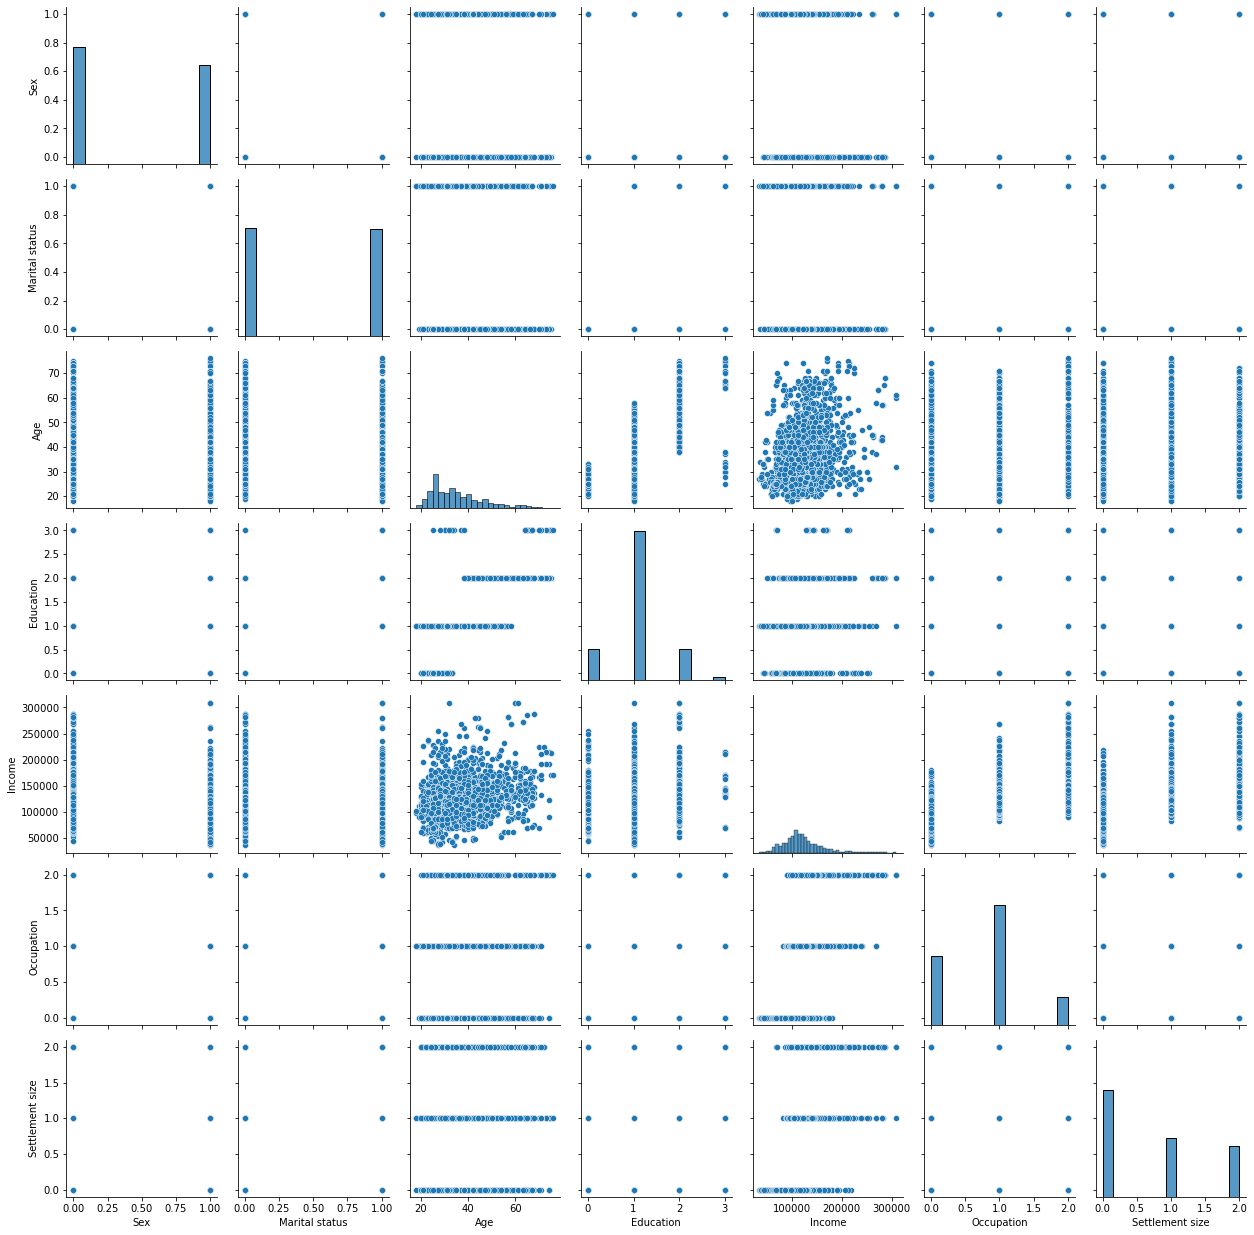

In [12]:
g = sns.PairGrid(data.iloc[:, 1:])
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

Let's first standrize the data

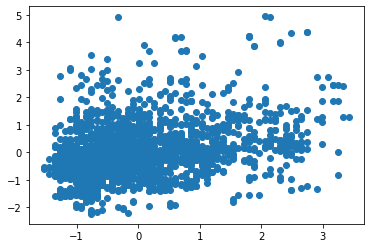

In [25]:
from sklearn.preprocessing import StandardScaler
# this function will do the  (X-mean)/Std scaling which should result in data with mean of 0 and std of 1
normalized_data = pd.DataFrame(StandardScaler().fit_transform(data[['Age','Income']]))
normalized_data.columns = ['Age','Income']

plt.scatter(normalized_data.Age, normalized_data.Income)

In [26]:
new_data = data.copy()

In [27]:
new_data['Income'] = normalized_data['Income']

In [28]:
new_data.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,0.097524,1,2
1,100000002,1,1,22,1,0.782654,1,2
2,100000003,0,0,49,1,-0.833202,0,0
3,100000004,0,0,45,1,1.328386,1,1
4,100000005,0,0,53,1,0.736932,1,1


## Train the model

In [29]:
from sklearn.cluster import KMeans

In [30]:
new_data_array = data.to_numpy()

### 2 clusters

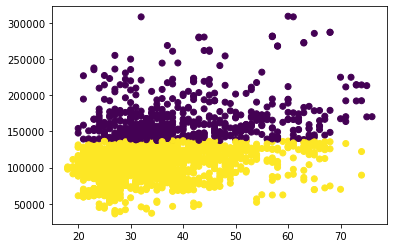

In [31]:
kmeans = KMeans(n_clusters=2, random_state=1).fit_predict(new_data_array)

plt.scatter(new_data_array[:, 3], new_data_array[:, 5], c=kmeans)

### 3 clusters

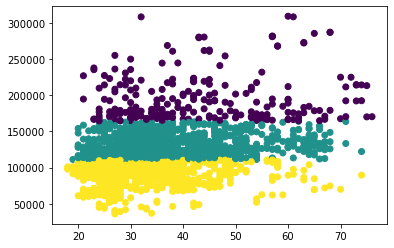

In [33]:
kmeans = KMeans(n_clusters=3, random_state=1).fit_predict(new_data_array)

plt.scatter(new_data_array[:, 3], new_data_array[:, 5], c=kmeans)

### 5 clusters

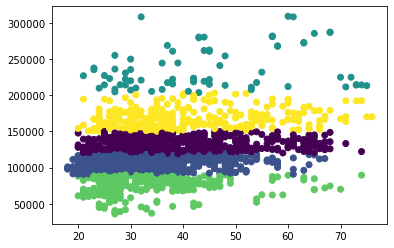

In [34]:
kmeans = KMeans(n_clusters=5, random_state=101).fit_predict(new_data_array)

plt.scatter(new_data_array[:, 3], new_data_array[:, 5], c=kmeans)

In [36]:
data['class'] = kmeans
data.sample(5)

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,class
668,100000669,0,0,43,1,140795,1,0,0
658,100000659,1,1,28,1,138952,1,1,0
70,100000071,1,1,30,1,169102,1,1,4
560,100000561,0,0,49,1,127543,1,1,0
1434,100001435,1,1,26,1,105726,1,0,1
